# EDA ~ Exploratory data analysis

In [1]:
g_path = "/Users/jaydeepchakraborty/JC/git-projects/ml_project/"
local_repo= '/Kaggle-Google-AI4Code/'

In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## train_orders.csv

In [3]:
fl_path= g_path+local_repo+'/train_orders.csv'
df_train_orders= pd.read_csv(fl_path)

In [4]:
print("len train_orders:- ", len(df_train_orders))
display(df_train_orders.head(5))
del df_train_orders

len train_orders:-  139256


,id,cell_order
0,00001756c60be8,1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...
1,00015c83e2717b,2e94bd7a 3e99dee9 b5e286ea da4f7550 c417225b 5...
2,0001bdd4021779,3fdc37be 073782ca 8ea7263c 80543cd8 38310c80 0...
3,0001daf4c2c76d,97266564 a898e555 86605076 76cc2642 ef279279 d...
4,0002115f48f982,9ec225f0 18281c6c e3b6b115 4a044c54 365fe576 a...


## train data

In [6]:
start= 0
end= 10
df_trains = []
for idx in range(start, end):
  fl_nm = g_path+local_repo+'Kaggle_Google_AI4Code_train_'+str(idx+1)+'.hdf'
  key = 'Kaggle_Google_AI4Code_train_'+str(idx+1)
  print("loading:- ", fl_nm)
  df_trains.append(pd.read_hdf(fl_nm, key=key))

loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_1.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_2.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_3.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_4.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_5.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_6.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_7.hdf
loading:-  /Users/jaydeepchakraborty/JC/git-projects/ml_project//Kaggle-Google-AI4Code/Kaggle_Google_AI4Code_train_8.hdf
loading:-  /Users/jaydeepchakrab

In [7]:
df_train = pd.concat(df_trains)
del df_trains

In [8]:
print("Train shape:- ", df_train.shape)

Train shape:-  (6370646, 2)


In [9]:
display("Train data:- ", df_train.head(10))

'Train data:- '

cell_type  \
id             cell_id              
00001756c60be8 1862f0a6      code   
               2a9e43d6      code   
               038b763d      code   
               2eefe0ef      code   
               0beab1cd      code   
               9a78ab76      code   
               ebe125d5      code   
               d9dced8b      code   
               86497fe1      code   
               e2c8e725      code   

                                                                    source  
id             cell_id                                                      
00001756c60be8 1862f0a6  # This Python 3 environment comes with many he...  
               2a9e43d6  import numpy as np\nimport pandas as pd\nimpor...  
               038b763d  import warnings\nwarnings.filterwarnings('igno...  
               2eefe0ef      matplotlib.rcParams.update({'font.size': 14})  
               0beab1cd  def evaluate_preds(train_true_values, train_pr...  
               9a78ab76  TRAIN_DATASET_PATH = '/kaggle/input/real-estat...  
               ebe125d5  train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntr...  
               d9dced8b                                    train_df.dtypes  
               86497fe1  num_feat = list(train_df.select_dtypes(exclude...  
               e2c8e725  test_df = pd.read_csv(TEST_DATASET_PATH)\ntest...

In [10]:
df_train.columns

Index(['cell_type', 'source'], dtype='object')

In [11]:
'''
column "cell_type"
4204582/6370646 ~ 65.9% code
2166064/6370646 ~ 34.1% markdown
'''
print("Total number of cell_type:- ", len(df_train['cell_type']))
print("Total number of unique cell_type:- ", len(pd.unique(df_train['cell_type'])))
print("cell_type:- \n", pd.unique(df_train['cell_type']))

print("number of 'code' cells:- ", len(df_train[df_train['cell_type']=="code"]))
print("number of 'markdown' cells:- ", len(df_train[df_train['cell_type']=="markdown"]))

Total number of cell_type:-  6370646
Total number of unique cell_type:-  2
cell_type:- 
 ['code' 'markdown']
number of 'code' cells:-  4204582
number of 'markdown' cells:-  2166064


In [12]:
'''
column "source"
'''
print("Total number of source:- ", len(df_train['source']))
print("Total number of unique source:- ", len(pd.unique(df_train['source'])))

Total number of source:-  6370646
Total number of unique source:-  4860715


In [13]:
tmp = df_train[df_train['cell_type']=="code"]
print("number of 'code' cells:- ", len(tmp['source']))
print("number of unique 'code' cells with source:- ", len(pd.unique(tmp['source'])))

tmp = df_train[df_train['cell_type']=="markdown"]
print("number of 'markdown' cells:- ", len(tmp['source']))
print("number of unique 'markdown' cells with source:- ", len(pd.unique(tmp['source'])))

del tmp

number of 'code' cells:-  4204582
number of unique 'code' cells with source:-  3169490
number of 'markdown' cells:-  2166064
number of unique 'markdown' cells with source:-  1693058


In [14]:
def clr_data(cell_val: str) -> list:
    split_ind = ' |,|\(|\{|\[|\)|\}|\]|\.|\%|\r\n|\r|\n'
    return list(filter(None, re.split(split_ind, cell_val)))

Min source Length =  0
Mean source Length =  35.19
Max source Length =  109208
Q_1:-  6.0 
Q_2:-  14.0 
Q_3:-  37.0 
IQR:-  31.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  3197387
len Q_2 - Q_3 :-  2692251
len Q_3 - max :-  612204


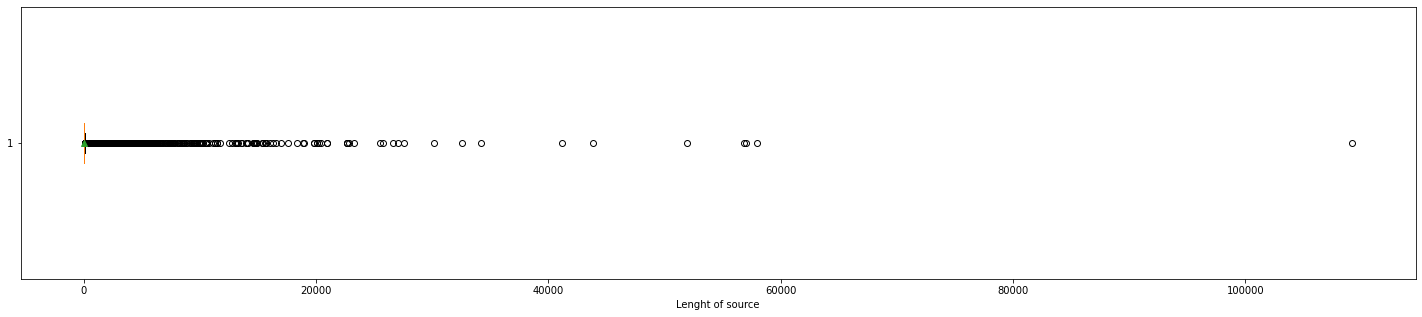

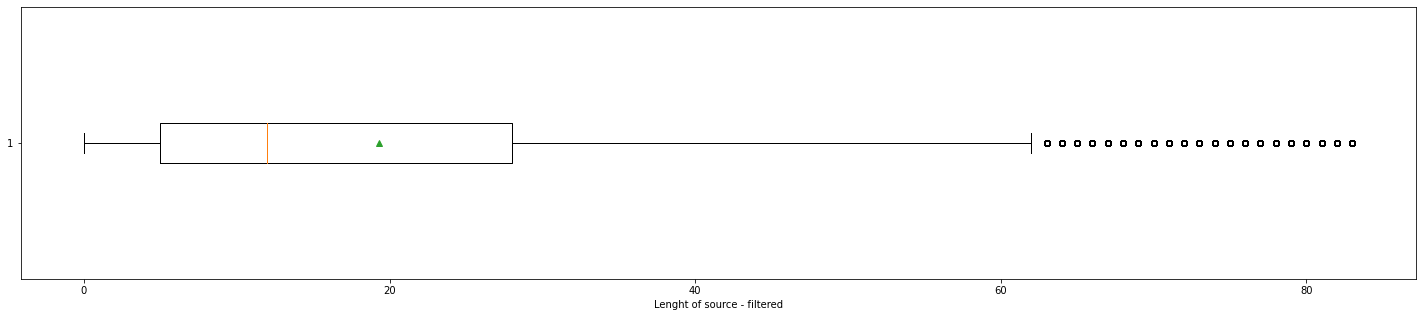

In [15]:
'''
source Length Distribution :
'''
tmp = np.array([len(clr_data(df_train["source"][i])) for i in range(len(df_train))])
print('Min source Length = ', min(tmp))
print('Mean source Length = ', round(np.mean(tmp),2))
print('Max source Length = ', max(tmp))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source");


# Q1, Q2, Q3 ~ quantile
Q_val = pd.Series(tmp).quantile([0.25,0.5,0.75]).tolist()
Q_1 = Q_val[0]
Q_2 = Q_val[1]
Q_3 = Q_val[2]
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

print("len min - Q_1 :- ", len(tmp[(tmp< (Q_1 - 1.5 * IQR))]))
print("len Q_1 - Q_2 :- ", len(tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_2))]))
print("len Q_2 - Q_3 :- ", len(tmp[(tmp>= (Q_2)) & (tmp<= (Q_3 + 1.5 * IQR))]))
print("len Q_3 - max :- ", len(tmp[(tmp>= (Q_3 + 1.5 * IQR))]))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
tmp = tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_3 + 1.5 * IQR))]

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source - filtered");

del tmp

In [16]:
for i in range(len(df_train)):
    if len(clr_data(df_train["source"][i])) >= 10 and len(clr_data(df_train["source"][i])) <= 100:
        print(df_train["source"][i])
        print(clr_data(df_train["source"][i]))
        break

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
['import', 'numpy', 'as', 'np', 'import', 'pandas', 'as', 'pd', 'import', 'random', 'from', 'sklearn', 'model_selection', 'import', 'train_test_split', 'cross_val_score', 'from', 'sklearn', 'preprocessing', 'import', 'StandardScaler', 'RobustScaler', 'from', 'catboost', 'import', 'CatBoostRegressor', 'from', 'sklearn', 'ensemble', 'import', 'RandomForestRegressor', 'from', 'sklearn', 'metrics', 'import', 'r2_score', 'as', 'r2', 'from', 'sklearn', 'model_selection', 'import', 'KFold', 'GridSearchC

Min source Length =  0
Mean source Length =  37.57
Max source Length =  109208
Q_1:-  6.0 
Q_2:-  16.0 
Q_3:-  39.0 
IQR:-  33.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  2128482
len Q_2 - Q_3 :-  1759095
len Q_3 - max :-  398733


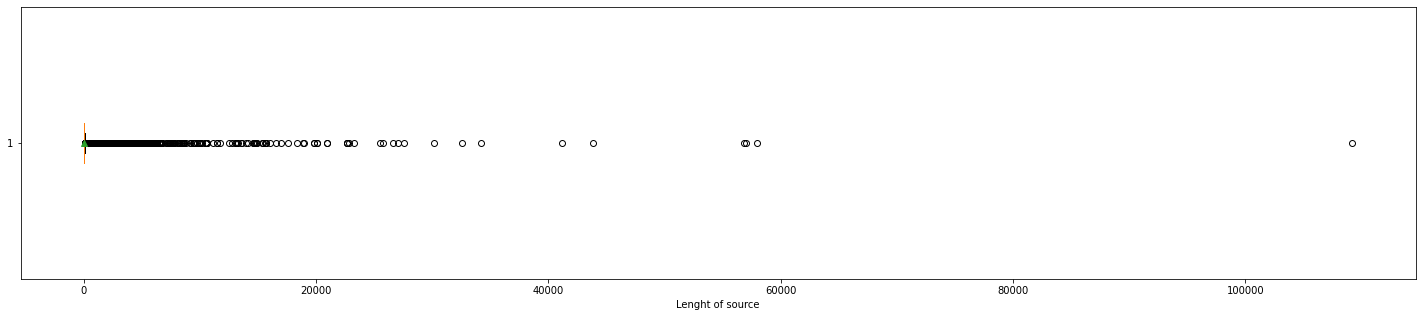

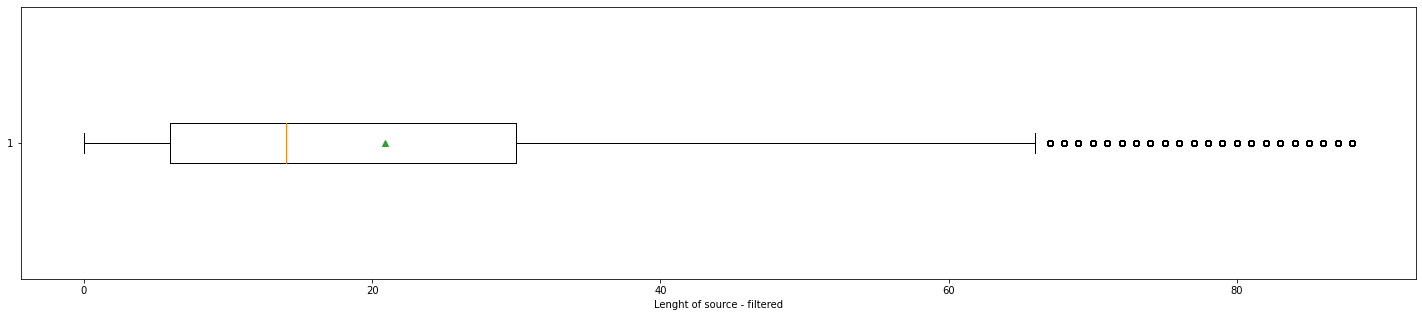

In [17]:
'''
source Length ~ code cell Distribution :
'''
tmp = df_train[df_train['cell_type']=="code"]
tmp = np.array([len(clr_data(tmp["source"][i])) for i in range(len(tmp))])
print('Min source Length = ', min(tmp))
print('Mean source Length = ', round(np.mean(tmp),2))
print('Max source Length = ', max(tmp))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source");


# Q1, Q2, Q3 ~ quantile
Q_val = pd.Series(tmp).quantile([0.25,0.5,0.75]).tolist()
Q_1 = Q_val[0]
Q_2 = Q_val[1]
Q_3 = Q_val[2]
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

print("len min - Q_1 :- ", len(tmp[(tmp< (Q_1 - 1.5 * IQR))]))
print("len Q_1 - Q_2 :- ", len(tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_2))]))
print("len Q_2 - Q_3 :- ", len(tmp[(tmp>= (Q_2)) & (tmp<= (Q_3 + 1.5 * IQR))]))
print("len Q_3 - max :- ", len(tmp[(tmp>= (Q_3 + 1.5 * IQR))]))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
tmp = tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_3 + 1.5 * IQR))]

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source - filtered");

del tmp

In [18]:
tmp = df_train[df_train['cell_type']=="code"]
for i in range(len(tmp)):
    if len(clr_data(tmp["source"][i])) >= 10 and len(clr_data(tmp["source"][i])) <= 100:
        print(tmp["source"][i])
        print(clr_data(tmp["source"][i]))
        break

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
['import', 'numpy', 'as', 'np', 'import', 'pandas', 'as', 'pd', 'import', 'random', 'from', 'sklearn', 'model_selection', 'import', 'train_test_split', 'cross_val_score', 'from', 'sklearn', 'preprocessing', 'import', 'StandardScaler', 'RobustScaler', 'from', 'catboost', 'import', 'CatBoostRegressor', 'from', 'sklearn', 'ensemble', 'import', 'RandomForestRegressor', 'from', 'sklearn', 'metrics', 'import', 'r2_score', 'as', 'r2', 'from', 'sklearn', 'model_selection', 'import', 'KFold', 'GridSearchC

Min source Length =  0
Mean source Length =  30.56
Max source Length =  51902
Q_1:-  5.0 
Q_2:-  11.0 
Q_3:-  32.0 
IQR:-  27.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  1107738
len Q_2 - Q_3 :-  890609
len Q_3 - max :-  219056


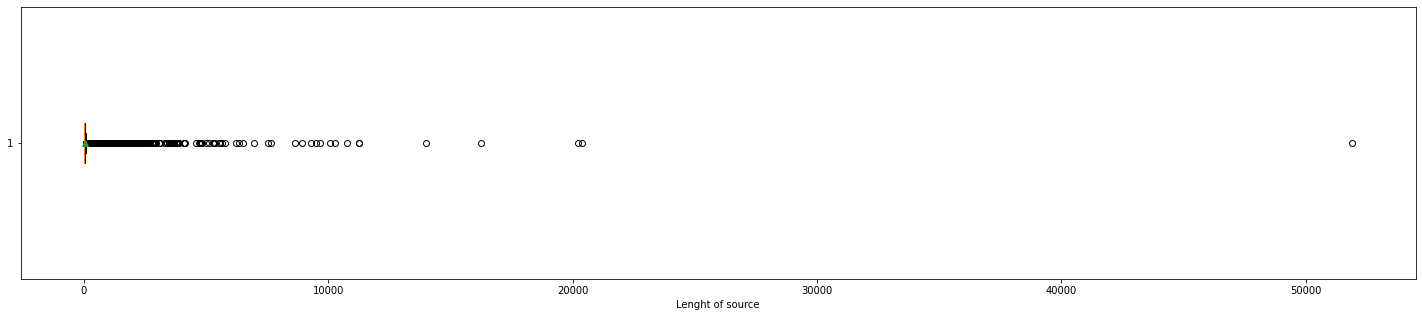

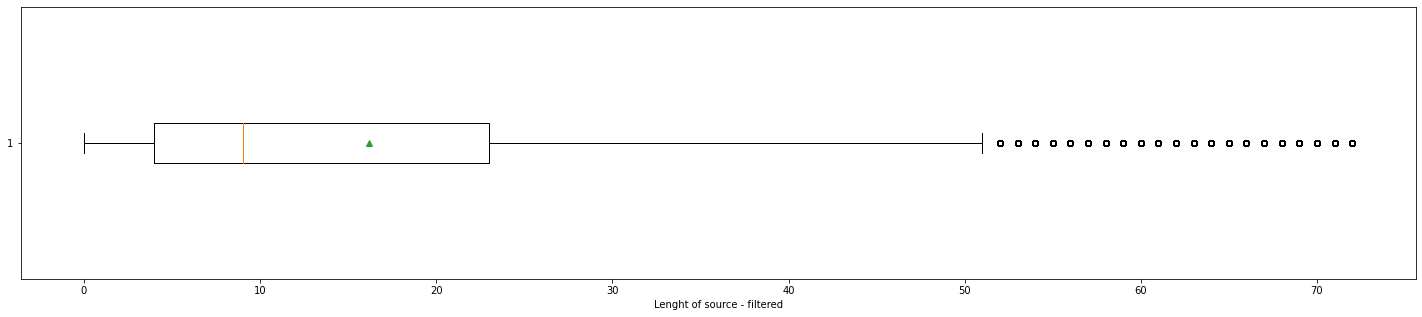

In [19]:
'''
source Length ~ markdown cell Distribution :
'''
tmp = df_train[df_train['cell_type']=="markdown"]
tmp = np.array([len(clr_data(tmp["source"][i])) for i in range(len(tmp))])
print('Min source Length = ', min(tmp))
print('Mean source Length = ', round(np.mean(tmp),2))
print('Max source Length = ', max(tmp))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source");


# Q1, Q2, Q3 ~ quantile
Q_val = pd.Series(tmp).quantile([0.25,0.5,0.75]).tolist()
Q_1 = Q_val[0]
Q_2 = Q_val[1]
Q_3 = Q_val[2]
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

print("len min - Q_1 :- ", len(tmp[(tmp< (Q_1 - 1.5 * IQR))]))
print("len Q_1 - Q_2 :- ", len(tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_2))]))
print("len Q_2 - Q_3 :- ", len(tmp[(tmp>= (Q_2)) & (tmp<= (Q_3 + 1.5 * IQR))]))
print("len Q_3 - max :- ", len(tmp[(tmp>= (Q_3 + 1.5 * IQR))]))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
tmp = tmp[(tmp>= (Q_1 - 1.5 * IQR)) & (tmp<= (Q_3 + 1.5 * IQR))]

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(tmp, vert=False, showbox=True, showmeans=True)
plt.xlabel("Lenght of source - filtered");

del tmp

In [20]:
tmp = df_train[df_train['cell_type']=="markdown"]
for i in range(len(tmp)):
    if len(clr_data(tmp["source"][i])) >= 10 and len(clr_data(tmp["source"][i])) <= 100:
        print(tmp["source"][i])
        print(clr_data(tmp["source"][i]))
        break

Выбросы наблюдаются в: HouseYear, KitchenSquare.

Признаки с аномально высоким значением, которые нужно будет ограничить: HouseFloor, LifeSquare, Rooms, Square.
['Выбросы', 'наблюдаются', 'в:', 'HouseYear', 'KitchenSquare', 'Признаки', 'с', 'аномально', 'высоким', 'значением', 'которые', 'нужно', 'будет', 'ограничить:', 'HouseFloor', 'LifeSquare', 'Rooms', 'Square']


min str frequency:-  1
max str frequency:-  9713752
Q_1:-  1.0 
Q_2:-  2.0 
Q_3:-  4.0 
IQR:-  3.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  3720137
len Q_2 - Q_3 :-  2221208
len Q_3 - max :-  668599


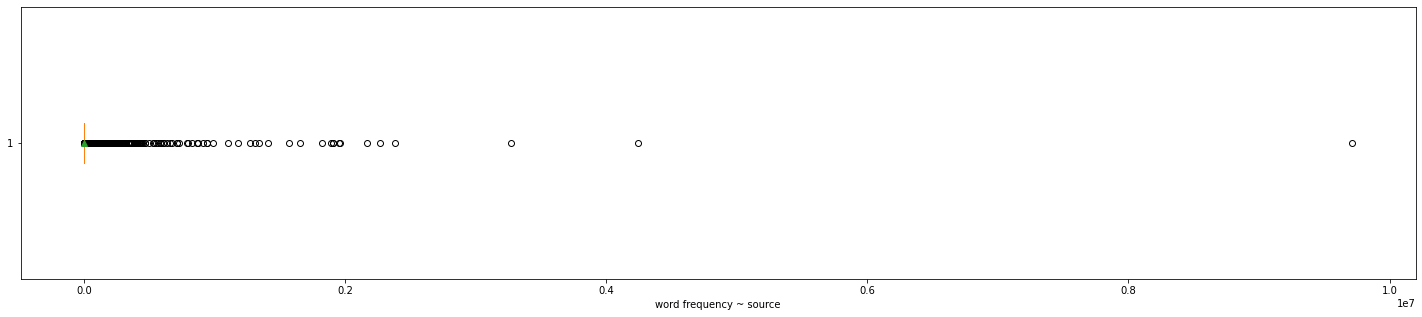

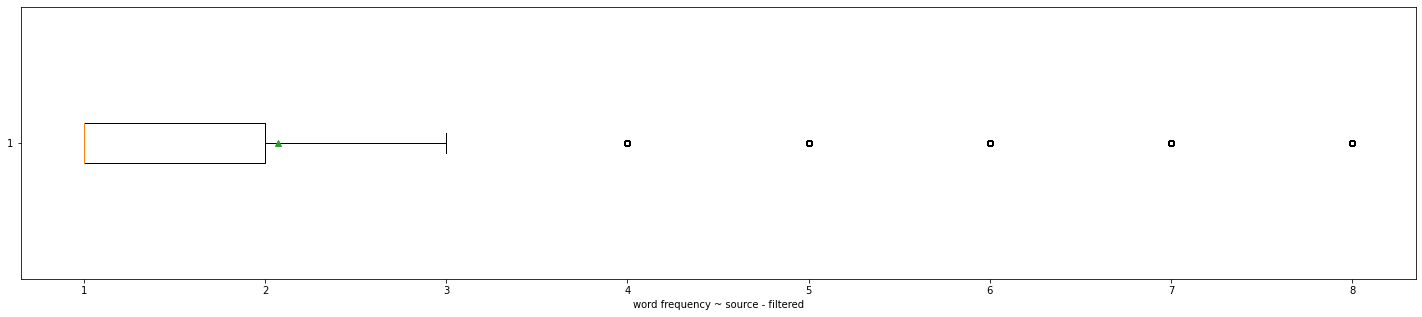

In [40]:
'''
source word frequency :
'''
word_freq = {}
tmp = [clr_data(x) for x in df_train["source"]]

for str_vals in tmp:
    for str_val in str_vals:
        if str_val in word_freq:
            word_freq[str_val] += 1
        else:
            word_freq[str_val] = 1

str_keys = word_freq.keys()
str_cnts = list(word_freq.values())

print("min str frequency:- ", min(str_cnts))
print("max str frequency:- ", max(str_cnts))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source");

# Q1, Q2, Q3 ~ quantile
Q_1 = np.quantile(str_cnts, 0.25)
Q_2 = np.quantile(str_cnts, 0.50)
Q_3 = np.quantile(str_cnts, 0.75)
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

tmp = [str_cnt for str_cnt in str_cnts if (str_cnt< (Q_1 - 1.5 * IQR))]
print("len min - Q_1 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_2))]
print("len Q_1 - Q_2 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_2)) & (str_cnt<= (Q_3 + 1.5 * IQR))]
print("len Q_2 - Q_3 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_3 + 1.5 * IQR))]
print("len Q_3 - max :- ", len(tmp))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
str_cnts = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_3 + 1.5 * IQR))] 

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source - filtered");


del str_keys
del str_cnts
del tmp

In [41]:
for key in word_freq.keys():
    if(word_freq[key] >= 10 and word_freq[key]<=100):
        print(key)
        break

del word_freq

train_true_values


min str frequency:-  1
max str frequency:-  9546857
Q_1:-  1.0 
Q_2:-  2.0 
Q_3:-  4.0 
IQR:-  3.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  2633041
len Q_2 - Q_3 :-  1810743
len Q_3 - max :-  544656


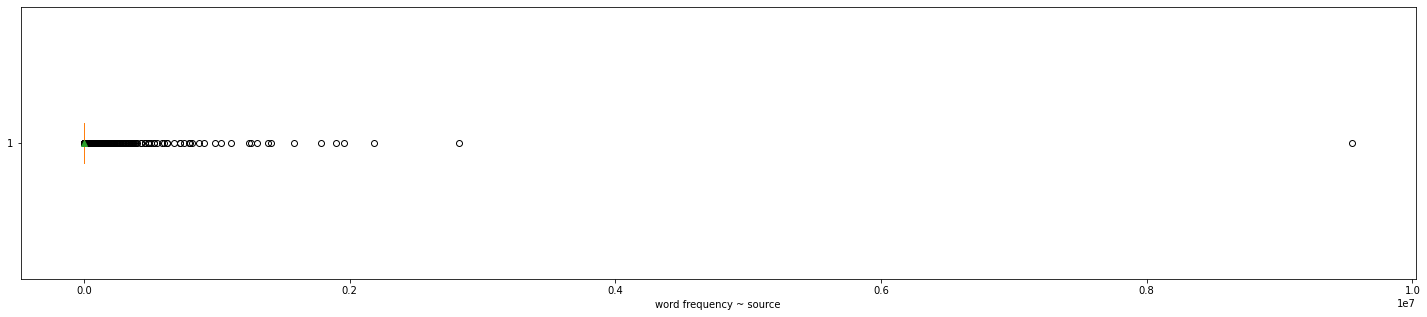

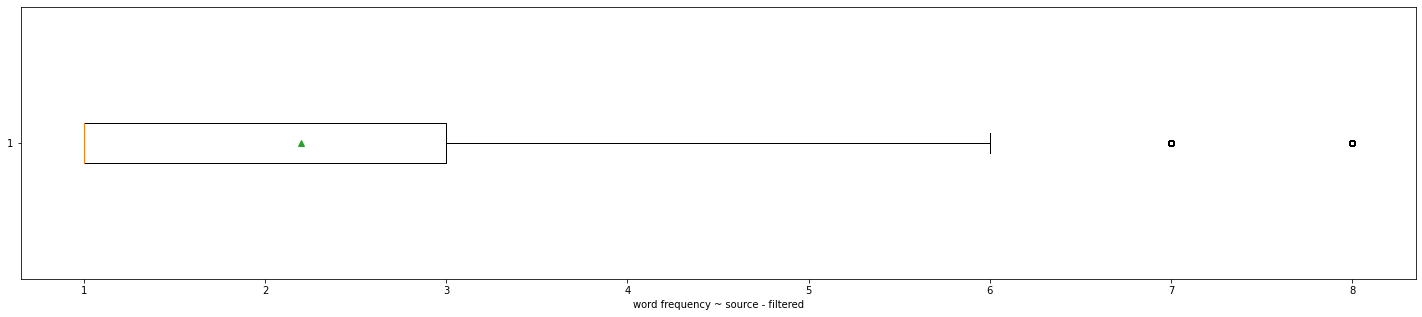

In [42]:
'''
source word ~ code cell frequency :
'''
tmp = df_train[df_train['cell_type']=="code"]
word_freq = {}
tmp = [clr_data(x) for x in tmp["source"]]

for str_vals in tmp:
    for str_val in str_vals:
        if str_val in word_freq:
            word_freq[str_val] += 1
        else:
            word_freq[str_val] = 1

str_keys = word_freq.keys()
str_cnts = list(word_freq.values())

print("min str frequency:- ", min(str_cnts))
print("max str frequency:- ", max(str_cnts))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source ~ code cell");

# Q1, Q2, Q3 ~ quantile
Q_1 = np.quantile(str_cnts, 0.25)
Q_2 = np.quantile(str_cnts, 0.50)
Q_3 = np.quantile(str_cnts, 0.75)
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

tmp = [str_cnt for str_cnt in str_cnts if (str_cnt< (Q_1 - 1.5 * IQR))]
print("len min - Q_1 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_2))]
print("len Q_1 - Q_2 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_2)) & (str_cnt<= (Q_3 + 1.5 * IQR))]
print("len Q_2 - Q_3 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_3 + 1.5 * IQR))]
print("len Q_3 - max :- ", len(tmp))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
str_cnts = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_3 + 1.5 * IQR))] 

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source ~ code cell - filtered");


del str_keys
del str_cnts
del tmp

In [43]:
for key in word_freq.keys():
    if(word_freq[key] >= 10 and word_freq[key]<=100):
        print(key)
        break

del word_freq

train_true_values


min str frequency:-  1
max str frequency:-  3002822
Q_1:-  1.0 
Q_2:-  1.0 
Q_3:-  2.0 
IQR:-  1.0
len min - Q_1 :-  0
len Q_1 - Q_2 :-  1084738
len Q_2 - Q_3 :-  1450934
len Q_3 - max :-  341195


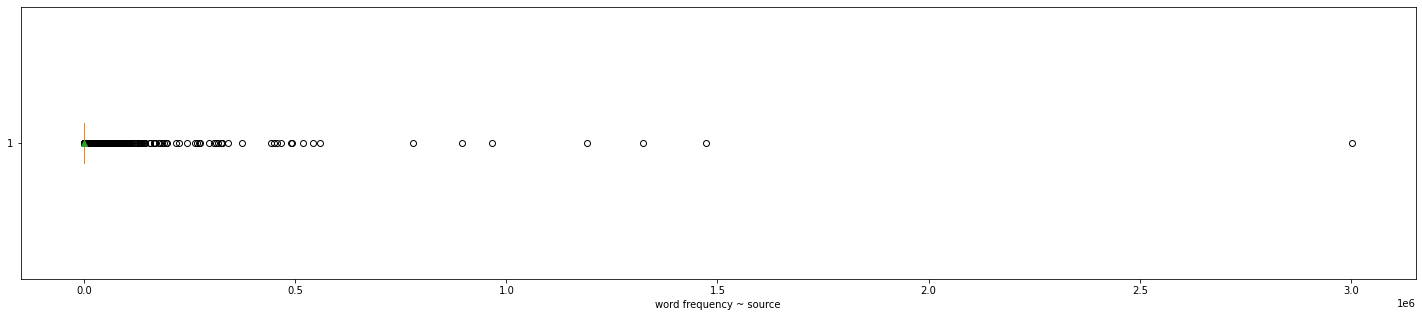

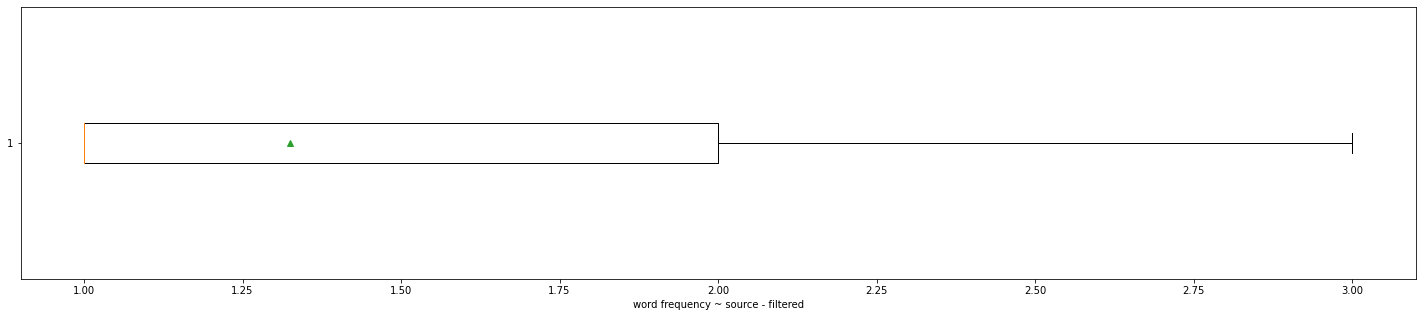

In [46]:
'''
source word ~ markdown cell frequency :
'''
tmp = df_train[df_train['cell_type']=="markdown"]
word_freq = {}
tmp = [clr_data(x) for x in tmp["source"]]

for str_vals in tmp:
    for str_val in str_vals:
        if str_val in word_freq:
            word_freq[str_val] += 1
        else:
            word_freq[str_val] = 1

str_keys = word_freq.keys()
str_cnts = list(word_freq.values())

print("min str frequency:- ", min(str_cnts))
print("max str frequency:- ", max(str_cnts))


fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source ~ markdown");

# Q1, Q2, Q3 ~ quantile
Q_1 = np.quantile(str_cnts, 0.25)
Q_2 = np.quantile(str_cnts, 0.50)
Q_3 = np.quantile(str_cnts, 0.75)
IQR = Q_3 - Q_1

print("Q_1:- ", Q_1, "\nQ_2:- ", Q_2, "\nQ_3:- ", Q_3, "\nIQR:- ", IQR)

tmp = [str_cnt for str_cnt in str_cnts if (str_cnt< (Q_1 - 1.5 * IQR))]
print("len min - Q_1 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_2))]
print("len Q_1 - Q_2 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_2)) & (str_cnt<= (Q_3 + 1.5 * IQR))]
print("len Q_2 - Q_3 :- ", len(tmp))
tmp = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_3 + 1.5 * IQR))]
print("len Q_3 - max :- ", len(tmp))

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
str_cnts = [str_cnt for str_cnt in str_cnts if (str_cnt>= (Q_1 - 1.5 * IQR)) & (str_cnt<= (Q_3 + 1.5 * IQR))] 

fig,ax= plt.subplots(figsize= (25,5))
plt.boxplot(str_cnts, vert=False, showbox=True, showmeans=True)
plt.xlabel("word frequency ~ source ~ markdown - filtered");


del str_keys
del str_cnts
del tmp

In [47]:
for key in word_freq.keys():
    if(word_freq[key] >= 10 and word_freq[key]<=100):
        print(key)
        break

del word_freq

Выбросы


## test

In [ ]:
df_test = pd.read_hdf('Kaggle_Google_AI4Code_test.hdf', key='Kaggle_Google_AI4Code_test')

In [ ]:
print("Test shape:- ", df_test.shape)